In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter

In [3]:
df = pd.read_csv("data/tripadvisor_cleaned.csv")

In [4]:
# Set Seaborn style
sns.set_theme(style="whitegrid")

In [9]:
# Display basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125527 entries, 0 to 125526
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               125527 non-null  object 
 1   City               125527 non-null  object 
 2   Cuisine Style      125527 non-null  object 
 3   Ranking            125527 non-null  int64  
 4   Rating             125527 non-null  float64
 5   Price Range        125527 non-null  object 
 6   Number of Reviews  125527 non-null  int64  
 7   Reviews            125527 non-null  object 
 8   URL_TA             125527 non-null  object 
 9   ID_TA              125527 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 9.6+ MB
None
             Ranking         Rating  Number of Reviews
count  125527.000000  125527.000000      125527.000000
mean     3549.714022       3.988732         107.888239
std      3580.449242       0.650013         291.776974
min         1.

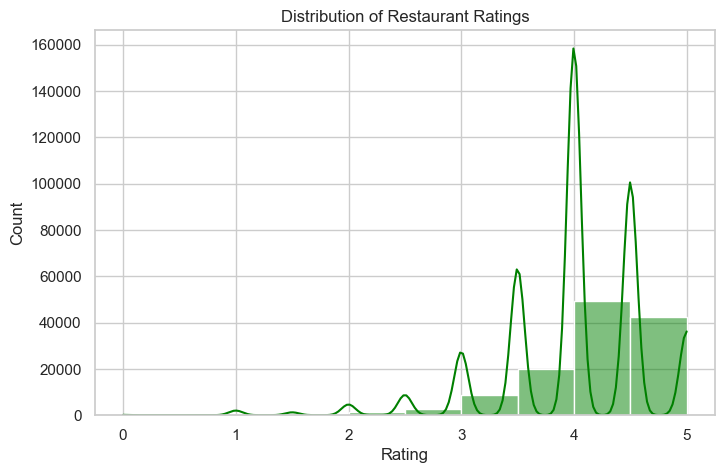

In [11]:
# Distribution of Ratings
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=10, kde=True, color='green')
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

C:\Users\T570\AppData\Local\Temp\ipykernel_11644\3740942730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Price Range'], order=df['Price Range'].value_counts().index, palette="crest")


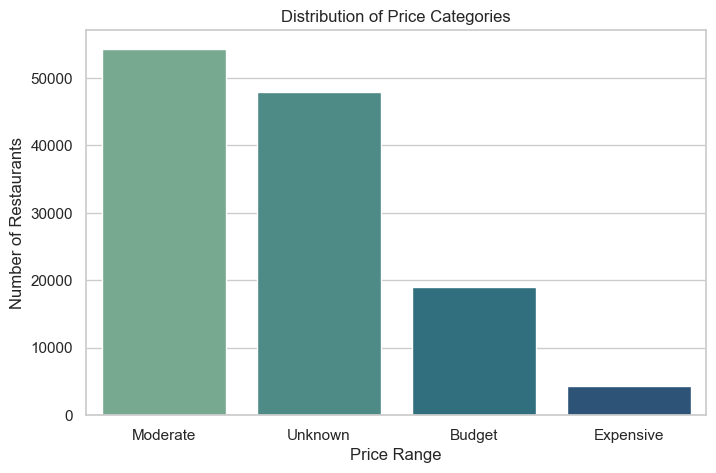

In [13]:
# Price Category Distribution
plt.figure(figsize=(8,5))
sns.countplot(x=df['Price Range'], order=df['Price Range'].value_counts().index, palette="crest")
plt.title("Distribution of Price Categories")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.show()

C:\Users\T570\AppData\Local\Temp\ipykernel_11644\3042213668.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x="Number of Reviews", y="Rating", alpha=0.5, palette="crest")


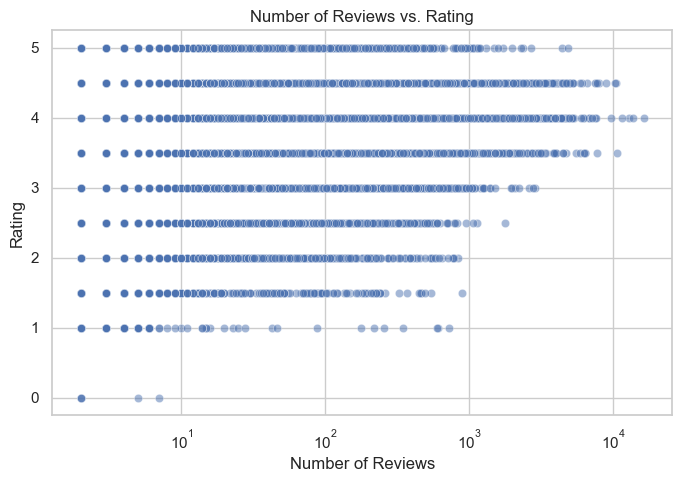

In [16]:
# Relationship: Number of Reviews vs. Rating
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Number of Reviews", y="Rating", alpha=0.5, palette="crest")
plt.title("Number of Reviews vs. Rating")
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.xscale("log")  # Log scale to handle large values
plt.show()

C:\Users\T570\AppData\Local\Temp\ipykernel_11644\114966903.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Price Range", y="Rating", data=df, order=["Budget", "Moderate", "Expensive"], palette="crest")


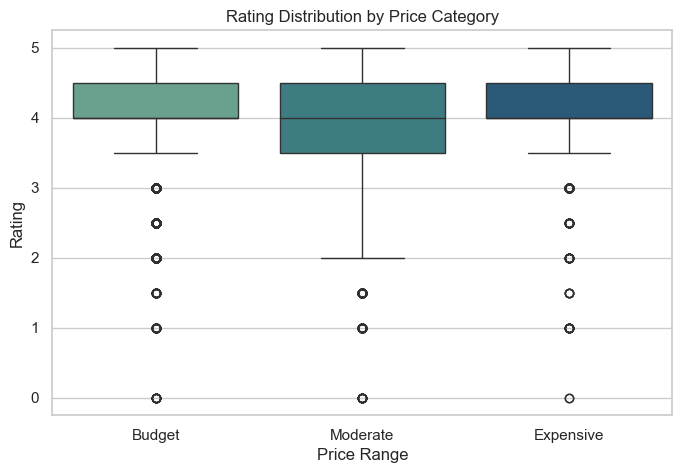

In [18]:
# Boxplot: Rating by Price Category
plt.figure(figsize=(8,5))
sns.boxplot(x="Price Range", y="Rating", data=df, order=["Budget", "Moderate", "Expensive"], palette="crest")
plt.title("Rating Distribution by Price Category")
plt.xlabel("Price Range")
plt.ylabel("Rating")
plt.show()

## Initial Observations

- Most restuarants have a rating of 4, then 4.5 then 3.5.
- Most restaurants are considered "Moderate" in terms of price category. Least are "Expensive". Many "Unknown".
- Higher-rated restaurants tend to have more reviews (4 - 5 stars)
- Lower-rated restaurants have fewer reviews (1 - 2 stars)
- A few low-rated restaurants have high number of reviews -> Infamously bad of controversial?
- Some highly-rated restaurants have very few reviews -> Possibly new or niche.

In [5]:
# Sort by Number of Reviews and display top 10
top_reviewed = df.sort_values(by="Number of Reviews", ascending=False).head(10)

# Display DataFrame
print("📊 Top 10 Most Reviewed Restaurants:")
print(top_reviewed[['Name', 'City', 'Number of Reviews', 'Rating', 'Price Range']])


📊 Top 10 Most Reviewed Restaurants:
                            Name       City  Number of Reviews  Rating  \
83668               Hofbraeuhaus     Munich              16478     4.0   
77109                      Luini      Milan              13862     4.0   
46329                 Aqua Shard     London              12910     4.0   
67590      Mercado de San Miguel     Madrid              11497     4.0   
90379       Le Bouillon Chartier      Paris              10706     3.5   
5581         Cerveceria Catalana  Barcelona              10504     4.5   
109253        Grazia & Graziella       Rome              10300     4.5   
45955      London Steakhouse Co.     London               9660     4.0   
109194          Cantina e Cucina       Rome               8927     4.5   
5557    Ciudad Condal Restaurant  Barcelona               7964     4.5   

       Price Range  
83668     Moderate  
77109       Budget  
46329    Expensive  
67590     Moderate  
90379       Budget  
5581      Moderate  
10

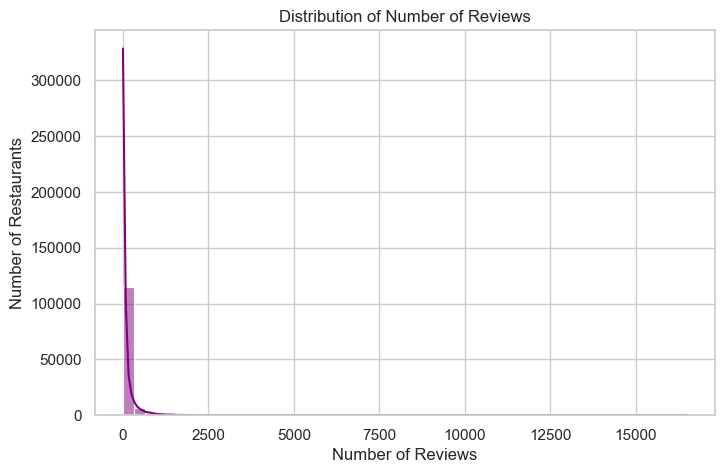

In [ ]:
# Plot histogram
plt.figure(figsize=(8,5))
sns.histplot(df['Number of Reviews'], bins=50, kde=True, color='purple')
plt.title("Distribution of Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Restaurants")
plt.show()


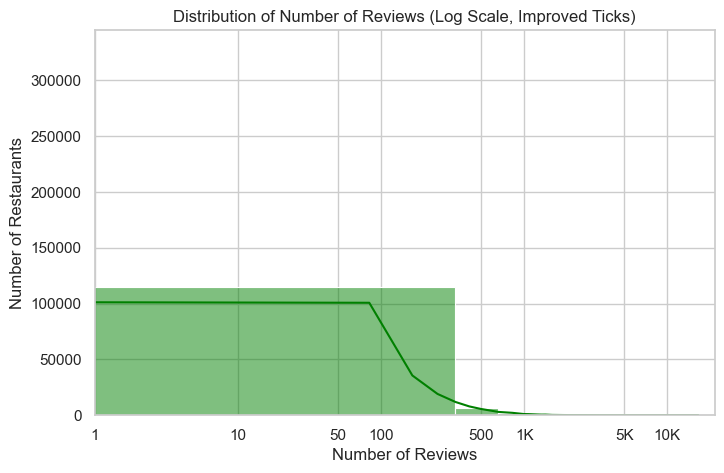

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['Number of Reviews'], bins=50, kde=True, color='green')

# Use a log scale, but with readable tick labels
plt.xscale("log")
plt.xticks([1, 10, 50, 100, 500, 1000, 5000, 10000],  # Specific points
           ["1", "10", "50", "100", "500", "1K", "5K", "10K"])  # Readable labels

plt.title("Distribution of Number of Reviews (Log Scale, Improved Ticks)")
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Restaurants")
plt.show()


- Distribution is skewed
- Most restautants have very few reviews
- Highest concentration around 1 - 50 reviews (low engagement on TripAdvisor).
- Steep drop off after 100 reviews.
- very few restaurants with 1000+ reviews.
- long-tail disribution - only small fraction of restaurants dominate review count.

In [16]:
# Select the top 1% most reviewed restaurants
threshold = df["Number of Reviews"].quantile(0.99)  # Top 1% threshold
top_reviewed_df = df[df["Number of Reviews"] >= threshold]

# Count most common price range among top-reviewed restaurants
price_counts = top_reviewed_df["Price Range"].value_counts()
print("\n💰 Most Common Price Ranges:")
print(price_counts)

# Identify the most common cuisines
cuisine_list = []

for cuisines in top_reviewed_df["Cuisine Style"]:
    cuisine_list.extend(ast.literal_eval(cuisines))  # Convert string representation to list

cuisine_counts = Counter(cuisine_list).most_common(10)

# Convert to DataFrame for easy viewing
cuisine_df = pd.DataFrame(cuisine_counts, columns=["Cuisine", "Count"])
print("\n🍽️ Most Common Cuisines in Top-Reviewed Restaurants:")
print(cuisine_df)



💰 Most Common Price Ranges:
Price Range
Moderate     910
Expensive    224
Budget       112
Unknown       10
Name: count, dtype: int64

🍽️ Most Common Cuisines in Top-Reviewed Restaurants:
               Cuisine  Count
0  Vegetarian Friendly   1061
1  Gluten Free Options    866
2        Vegan Options    746
3             European    732
4        Mediterranean    479
5              Italian    350
6              Seafood    163
7     Central European    154
8                  Bar    149
9              British    147


- Moderately priced restuarnats dominate - suggests people are more likely to eat at mid-tier restaurants than very cheap or expensive ones. **Price-conscious but quality-seeking travelers engage the most**
- Expensive restaurants still get lots of reviews,although there ar fewer of them.
- Budget-friendly options are least common - don't attract much interest.

- Vegetarian, Gluten-free and Vegan-friendly restaurants dominate.
- Top 3 are all dietary preference-based - strong demand for healthier, inclusive options.
- Restaurants with dietary-friendly menus attract more reviews.**Dietary-friendly options (vegetarian, gluten-free, vegan) are in very high demand.**
- European & Mediterranean cuisines are also very popular - makes sense since they are all based in Europe.
-  **Mediterranean, European, and Italian cuisines are among the most reviewed.**


C:\Users\T570\AppData\Local\Temp\ipykernel_11956\861416244.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_ratings.index, y=city_ratings.values, palette="crest")


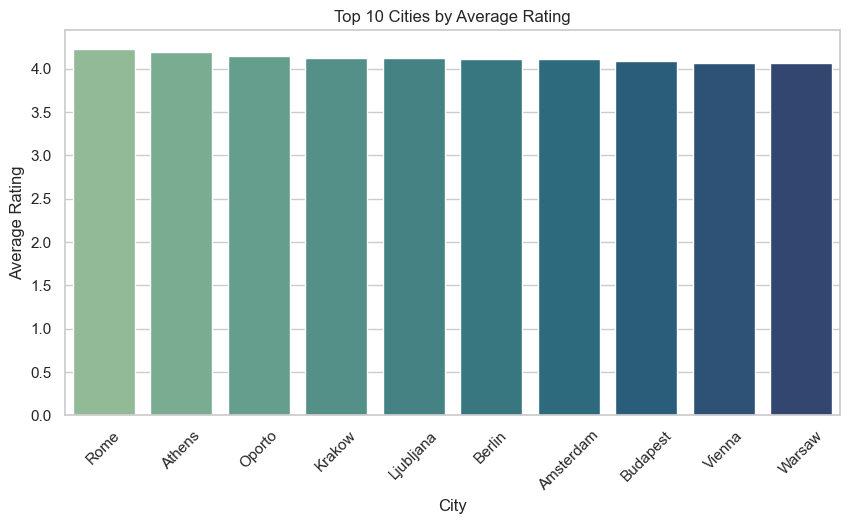

In [24]:
#Calculate Average Rating per City
city_ratings = df.groupby("City")["Rating"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=city_ratings.index, y=city_ratings.values, palette="crest")
plt.title("Top 10 Cities by Average Rating")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


C:\Users\T570\AppData\Local\Temp\ipykernel_11956\921089721.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_reviews.index, y=city_reviews.values, palette="crest")


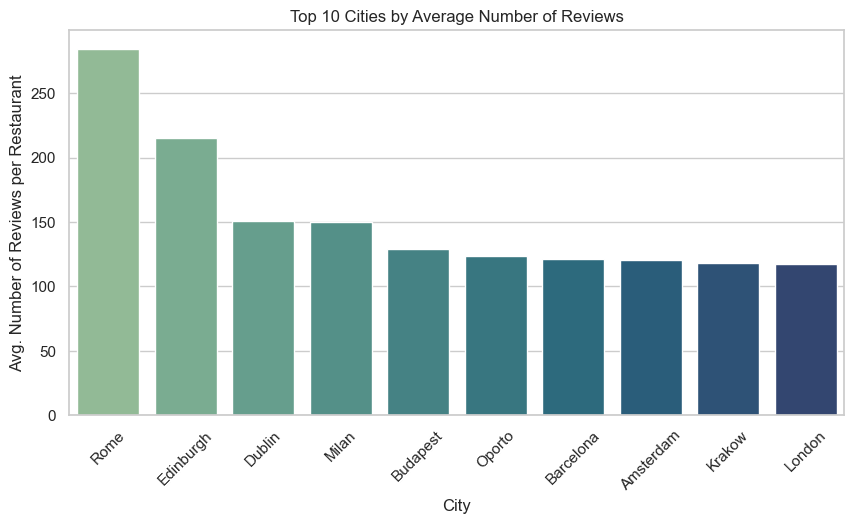

In [23]:
#Calculate Average Number of Reviews per City
city_reviews = df.groupby("City")["Number of Reviews"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=city_reviews.index, y=city_reviews.values, palette="crest")
plt.title("Top 10 Cities by Average Number of Reviews")
plt.xlabel("City")
plt.ylabel("Avg. Number of Reviews per Restaurant")
plt.xticks(rotation=45)
plt.show()

C:\Users\T570\AppData\Local\Temp\ipykernel_11956\352854783.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="crest")


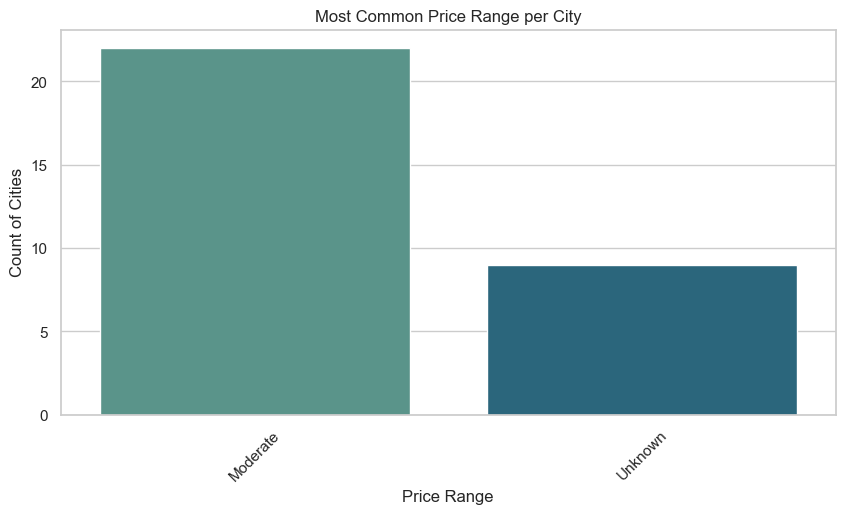

In [26]:
#Most Common Price Range per City
price_per_city = df.groupby("City")["Price Range"].agg(lambda x: x.mode()[0])  # Get most common price range
top_cities = price_per_city.value_counts()  # Show most frequent price ranges

plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="crest")
plt.title("Most Common Price Range per City")
plt.xlabel("Price Range")
plt.ylabel("Count of Cities")
plt.xticks(rotation=45)
plt.show()

- Rome dominates in terms of both rating and number of reviews.
- - Rome is highly touristic - could lead to higher review engagement.
- - Cities with rich food cultures could attract more reviews.

- Mediterranean region (Italy, Greece, Portugal) seem to dominate in restaurant quality.
- Central European cities (Krakow, Budapest, Vienna) also have well-rated restaurants, likely due to rich food traditions.

- Moderate pricing most common - accessible to broader audience.
- Significant amount of "Unknown" price ranges (missing data)